# Exploratory Data Analysis

<img align="right" style="padding-right:10px;" src="figures_wk3/Data-Preparation-for-Machine-Learning.png" width=200><br>


It has been estimated that 75% or more of a Data Scientist's time is spent manipulating the data before any "data science" can even start. Exploratory Data Analysis (EDA) is the process of **getting to know your data**.

Classical statistics tests hypotheses by fitting models that demonstrate relationships among the data. But what if you don't have a hypothesis?

**Exploratory Data Analysis** helps uncover those relationships so you can form hypotheses. EDA is the first step in virtually every **machine learning** model you will build. 

**_Data Preparation for Machine Learning_** is a great ebook by "machine learning specialist," Jason Brownlee. Even though the book does not explicitly state that it is teaching EDA, that is absolutely the purpose of the demonstrated techniques. 


We will be using the Palmer Penguins data set to demonstrate these concepts. The **Seaborn** graphing package can download and access the data from a repository on GitHub using its `load_dataset()` function. 

<img align="right" style="padding-right:10px;" src="figures_wk3/logo.png" width=200><br>

Reference:
> Data Preparation for Machine Learning<br>
> Jason Brownlee<br>
> https://machinelearningmastery.com/data-preparation-for-machine-learning/


>   Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer<br>
>   Archipelago (Antarctica) penguin data. R package version 0.1.0.<br>
>   https://allisonhorst.github.io/palmerpenguins/. doi:<br>
>   10.5281/zenodo.3960218.<br>

## The Bad News

EDA is as much art as it is science. The steps you take will depend as much on the data set and your end goal as any set of predefined recipe-like steps I can give you. All I can do is give you an introduction and encourage you to **continue to study the topic on your own**. 

## The Good News

The good news is that there are several tasks that you will need to do with every data set. Jason Brownlee gives us a basic framework for data preparation or EDA:

* **Data Cleaning**: Finding and fixing errors and problems in the data (outliers, missing data, etc.)<br>
* **Feature Selection**: Identifying the relationships between variables and their importance in the task.<br>
* **Data Transforms**: Change the scale or distribution of the numbers in a variable.<br>
* **Feature Engineering**: Creating new variables from existing variables.<br>
* **Dimensionality Reduction**: "Compacting" several variables down into a smaller number of variables (i.e. 10 variables down to 3 for easier graphing).<br>

Graphically, that looks something like this:<br>

<table>
    <tr>
        <td><img style="padding-right:10px;" src="figures_wk3/Data_cleaning_overview.png"></td>
        <td><img style="padding-right:10px;" src="figures_wk3/Feature_selection_overview.png"></td>
        <td><img style="padding-right:10px;" src="figures_wk3/Data_variable_overview.png"></td>
    </tr>
</table>
    

# Data Cleaning

Data cleaning is where you will find and handle missing values, look for outliers, detect duplicate rows, check to make sure columns have enough variance, etc.

Let's demonstrate these ideas with the data set. 

## Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Makes graphics look better
sns.set() 

The Palmer Penguins data set is one of the Seaborn "built-in" data sets. That is, a dataset stored in a special GitHub repository that Seaborn knows how to access.

In [2]:
penguins = sns.load_dataset('penguins')

<img style="padding-right:10px;" src="figures_wk3/lter_penguins.png" width="600"><br>

First of all, I don't know exactly what kind of variable the data was loaded into. Let's check. 

In [3]:
type(penguins)

pandas.core.frame.DataFrame

Great! Its a Pandas dataframe. 

Now, let's see the size.

In [4]:
penguins.shape

(344, 7)

344 rows by 7 columns. 

Let's look at the first few rows.

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<img style="padding-right:10px;" src="figures_wk3/culmen_depth.png" width="600"><br>

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


As you can see, the `info()` function tells us how many rows we have, how many non-null in each row, and data type for each row. 

Let's look at some more summary statistics, then we can sort out the missing categorical data. 

In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


You can also rotate that display for easier reading:

In [8]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


The "T" means "transform" -- in this case, swap rows and columns.

We will look at this data graphically in a few minutes.

## Missing Data

Looking at the first 5 rows above, we see one row where almost all the data is missing. Row 3 simply has the species and island filled out. That row probably won't contribute much to analysis and we could **drop it**. BUT, we need to be careful -- there are many ways to deal with missing data, and dropping rows is the sledgehammer approach. **Dropping rows should probably _NOT_ be the first tool you reach for.**

In [9]:
penguins[penguins.isnull().values.any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


As you can see, there are only 2 rows missing all data. The others only have sex data missing, **which can be inferred**. 

Another way to look at NaNs:

In [10]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

First, let's get rid of the entries that do not have a weight -- we will do this by copying all rows that have a weight into a new (but same-named) dataframe.

In [11]:
penguins = penguins[penguins.body_mass_g.notna()]

penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Notice that we immediately used `info()` to check and make sure we only dropped two rows.

It looks like the 'sex' column is the only one that still has missing values. Let's figure out what the percentage of missing values is:

In [12]:
penguins.sex.isnull().sum()

9

In [13]:
penguins.sex.isnull().sum() / penguins.shape[0] * 100

2.631578947368421

Only about 2.6% of the values in the 'sex' column are missing. There are various ways we could take care of these values:

1. As mentioned, we could drop these rows.
2. We could use one of Scikit-learn's imputer functions to figure out a value for us.
3. We could use the average (numerical) or the most frequent value (category)
4. **We could use machine learning to guess the values.**

\#4 is interesting -- if we consider our column with missing data as being our target, and columns that have data as being our predictor variables, then we can construct a machine learning model using complete records as the train and test data and records with incomplete entries as our general target. 

Let's try it:


First, we have to make sure our target column has only "Male", "Female", and " ". 

In [15]:
penguins.loc[(penguins.sex != "Male") & (penguins.sex != 'Female')]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


First, though, we need to change the **'object'** columns to categories.

## Categorical Data

The columns that have an **object** type have non-numeric data in them. That data could be something with little analytical value (like an individual person's name), or it could be something like a category. In this case, we could consider **species, island, and sex** to be categories. 

Most machine learning algorithms won't work with string data, but Pandas has a "category" data type that will display a string for **your** convenience, but actually be a number for the ML. 

There are some complexities to be aware of when converting categories from string to numeric. Numbers imply order. If we number the species like so:

* 1 - Chinstrap
* 2 - Adelie
* 3 - Gentoo

Does that imply that Chinstrap is *better* than Gentoo? There are more of them? They are bigger? In our case, the numbers have no meaning and we have to make sure the ML algorithms understand that. 

Pandas "category" type can be either ordered or unordered, with unordered being the default. Let's convert those columns now.

In [16]:
penguins.species = penguins.species.astype('category')
penguins.island = penguins.island.astype('category')
penguins.sex = penguins.sex.astype('category')

penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


### Pandas get_dummy()

Even though the columns are categories, they still need to be encoded, and Pandas has a function to help with that. 

In [17]:
peng_encoded = pd.get_dummies(penguins, columns=['island','species'], prefix=['island', 'species'])
peng_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,Male,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,Female,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,Female,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,Female,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,Male,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Female,1,0,0,0,0,1
340,46.8,14.3,215.0,4850.0,Female,1,0,0,0,0,1
341,50.4,15.7,222.0,5750.0,Male,1,0,0,0,0,1
342,45.2,14.8,212.0,5200.0,Female,1,0,0,0,0,1


In [18]:
peng_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   bill_length_mm     342 non-null    float64 
 1   bill_depth_mm      342 non-null    float64 
 2   flipper_length_mm  342 non-null    float64 
 3   body_mass_g        342 non-null    float64 
 4   sex                333 non-null    category
 5   island_Biscoe      342 non-null    uint8   
 6   island_Dream       342 non-null    uint8   
 7   island_Torgersen   342 non-null    uint8   
 8   species_Adelie     342 non-null    uint8   
 9   species_Chinstrap  342 non-null    uint8   
 10  species_Gentoo     342 non-null    uint8   
dtypes: category(1), float64(4), uint8(6)
memory usage: 15.8 KB


Now, just simple 0/1 for 'sex'.

In [19]:
peng_encoded['sex'] = peng_encoded['sex'].map({'Male':0, 'Female':1})

In [20]:
peng_encoded.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
island_Biscoe        0
island_Dream         0
island_Torgersen     0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
dtype: int64

In [21]:
peng_encoded.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1,0,0
6,38.9,17.8,181.0,3625.0,1,0,0,1,1,0,0
7,39.2,19.6,195.0,4675.0,0,0,0,1,1,0,0
8,34.1,18.1,193.0,3475.0,NaN,0,0,1,1,0,0
9,42.0,20.2,190.0,4250.0,NaN,0,0,1,1,0,0
10,37.8,17.1,186.0,3300.0,NaN,0,0,1,1,0,0


--- 

Scikit-learn also has many types of encoding for categories. You should spend some time investigating them.

## Impute Missing Data

Typically, we use capital 'x' as the dataset variable and 'y' as the target. We will be using a simple form of **supervised** machine learning, RandomForestClassifier. 

In supervised ML, our training dataset has to have known target values, so we will divide our data for training, testing and prediction. 

Now, for our data, we want all the rows that have a complete set of data and all the columns except 'sex'. That one will go into our training target dataset.

In [22]:
columns = [c for c in peng_encoded.columns if c != 'sex']

In [23]:
columns

['bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Biscoe',
 'island_Dream',
 'island_Torgersen',
 'species_Adelie',
 'species_Chinstrap',
 'species_Gentoo']

In [24]:
X = peng_encoded[peng_encoded.sex.notnull()].loc[:,columns]
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,0,0,1
340,46.8,14.3,215.0,4850.0,1,0,0,0,0,1
341,50.4,15.7,222.0,5750.0,1,0,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,0,0,1


Now, we need all the 'sex' values that are not null and corresponding to the array above.

The first set of square brackets choose which rows we want -- the not null ones -- and the second set choose the column we want. 

In [25]:
y = peng_encoded[peng_encoded.sex.notnull()]['sex']
y

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 333, dtype: category
Categories (2, int64): [1, 0]

Next, I'm going to split up the training data so I have a testing set and can look at accuracy statistics. 

In [26]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we import and use the classifier.

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
clf = RandomForestClassifier(n_estimators=100)

In [89]:
clf.fit(x_train, y_train)

RandomForestClassifier()

That's all there is to training the Classifier. Let's see how we did:

In [90]:
y_pred = clf.predict(x_test)

In [91]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [92]:
len(y_test)

100

In [93]:
from sklearn import metrics

In [94]:
print(f'Model accuracy = {metrics.accuracy_score(y_test,y_pred)}')

Model accuracy = 0.9


That's almost 90% accurate. Not bad! We could probably get better by segregating island and species, and on larger datasets it would probably be worth it. 

Now, let's get the missing values and move on...

In [95]:
x_missing = peng_encoded[peng_encoded.sex.isnull()].loc[:,columns]
x_missing

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
8,34.1,18.1,193.0,3475.0,0,0,1,1,0,0
9,42.0,20.2,190.0,4250.0,0,0,1,1,0,0
10,37.8,17.1,186.0,3300.0,0,0,1,1,0,0
11,37.8,17.3,180.0,3700.0,0,0,1,1,0,0
47,37.5,18.9,179.0,2975.0,0,1,0,1,0,0
246,44.5,14.3,216.0,4100.0,1,0,0,0,0,1
286,46.2,14.4,214.0,4650.0,1,0,0,0,0,1
324,47.3,13.8,216.0,4725.0,1,0,0,0,0,1
336,44.5,15.7,217.0,4875.0,1,0,0,0,0,1


In [96]:
y_missing = clf.predict(x_missing)

In [97]:
y_missing

array([1, 0, 1, 1, 1, 1, 1, 1, 1])

In [98]:
peng_encoded_bk = peng_encoded.copy()

In [99]:
x_missing['sex'] = y_missing.astype('int')

In [100]:
x_missing

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex
8,34.1,18.1,193.0,3475.0,0,0,1,1,0,0,1
9,42.0,20.2,190.0,4250.0,0,0,1,1,0,0,0
10,37.8,17.1,186.0,3300.0,0,0,1,1,0,0,1
11,37.8,17.3,180.0,3700.0,0,0,1,1,0,0,1
47,37.5,18.9,179.0,2975.0,0,1,0,1,0,0,1
246,44.5,14.3,216.0,4100.0,1,0,0,0,0,1,1
286,46.2,14.4,214.0,4650.0,1,0,0,0,0,1,1
324,47.3,13.8,216.0,4725.0,1,0,0,0,0,1,1
336,44.5,15.7,217.0,4875.0,1,0,0,0,0,1,1


Interestingly enough, it looks like the original indexes followed the rows all the way through the process. We should be able to use that to put the values back in the original dataframe.

In [101]:
x_missing.loc[8]

bill_length_mm         34.1
bill_depth_mm          18.1
flipper_length_mm     193.0
body_mass_g          3475.0
island_Biscoe           0.0
island_Dream            0.0
island_Torgersen        1.0
species_Adelie          1.0
species_Chinstrap       0.0
species_Gentoo          0.0
sex                     1.0
Name: 8, dtype: float64

In [48]:
penguins.loc[8]

species                 Adelie
island               Torgersen
bill_length_mm            34.1
bill_depth_mm             18.1
flipper_length_mm        193.0
body_mass_g             3475.0
sex                        NaN
Name: 8, dtype: object

In [45]:
x_missing.index.to_list()

[8, 9, 10, 11, 47, 246, 286, 324, 336]

In [102]:
x_missing['sex'] = x_missing['sex'].map({0:'Male', 1:'Female'})

In [47]:
x_missing

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex
8,34.1,18.1,193.0,3475.0,0,0,1,1,0,0,Female
9,42.0,20.2,190.0,4250.0,0,0,1,1,0,0,Male
10,37.8,17.1,186.0,3300.0,0,0,1,1,0,0,Female
11,37.8,17.3,180.0,3700.0,0,0,1,1,0,0,Female
47,37.5,18.9,179.0,2975.0,0,1,0,1,0,0,Female
246,44.5,14.3,216.0,4100.0,1,0,0,0,0,1,Female
286,46.2,14.4,214.0,4650.0,1,0,0,0,0,1,Female
324,47.3,13.8,216.0,4725.0,1,0,0,0,0,1,Female
336,44.5,15.7,217.0,4875.0,1,0,0,0,0,1,Female


In [103]:
for i in x_missing.index.to_list():
    penguins['sex'].loc[i] = x_missing['sex'].loc[i]

In [104]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                342 non-null    category
dtypes: category(3), float64(4)
memory usage: 22.8 KB


Now, the rows with the missing 'sex' data has the predictions added back in. All that is left to do is add the two dataframes back together and reset the index. 

Notice the **inplace=True** above. 

Let's check to make sure there aren't any NaNs left:

In [105]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Data Variance

Sometimes columns will have only 1 value or a very small number of unique values. Analytically speaking, these columns aren't worth much. 

**Variance** is defined as the average value from the mean. Therefore, columns that have only one value have **_zero_** variance. 

Let's briefly load a "standard" example machine learning data set to demonstrate.

In [106]:
oil = pd.read_csv('data_wk3/oil-spill.csv', header=None)

In [107]:
oil.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [108]:
oil.shape

(937, 50)

In [109]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       937 non-null    int64  
 1   1       937 non-null    int64  
 2   2       937 non-null    float64
 3   3       937 non-null    float64
 4   4       937 non-null    int64  
 5   5       937 non-null    float64
 6   6       937 non-null    float64
 7   7       937 non-null    float64
 8   8       937 non-null    float64
 9   9       937 non-null    float64
 10  10      937 non-null    float64
 11  11      937 non-null    float64
 12  12      937 non-null    float64
 13  13      937 non-null    float64
 14  14      937 non-null    float64
 15  15      937 non-null    float64
 16  16      937 non-null    float64
 17  17      937 non-null    float64
 18  18      937 non-null    float64
 19  19      937 non-null    float64
 20  20      937 non-null    float64
 21  21      937 non-null    float64
 22  22

We'll use the Pandas `nunique()` function to see how many unique values exist in each column:

In [111]:
oil.nunique()

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [112]:
oil[22].head()

0    0
1    0
2    0
3    0
4    0
Name: 22, dtype: int64

As you can see, Column 22 has only 1 unique value and several columns have fewer than 10 unique values. 

### Boxplots

Box-and-whisker plots, or just boxplots, can help detect this type of problem, also. Recall:<br> 
* The top and bottom "whiskers" show min and max values, <br>
* The bottom of the box shows the first quartile<br>
* The line in the middle shows the mean<br>
* The top of the box shows the third quartile.<br>
* Outliers are shown outside of the min/max whiskers.<br>

Pandas knows how to make boxplots of columns. It can plot all columns (default) or a list of columns. Here are a couple of examples from the oil spill dataset above:

<AxesSubplot:>

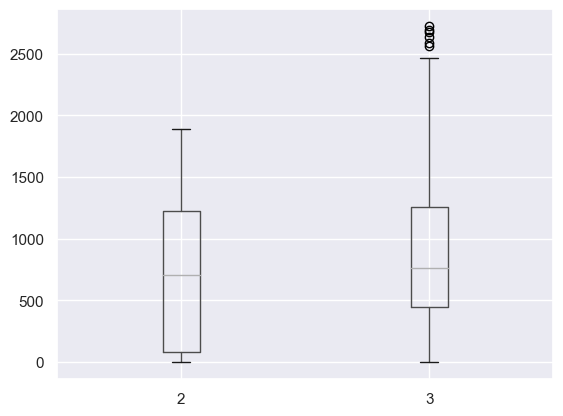

In [60]:
oil.boxplot([2,3])

Now, compare that to columns 22, 36, 45, etc.

<AxesSubplot:>

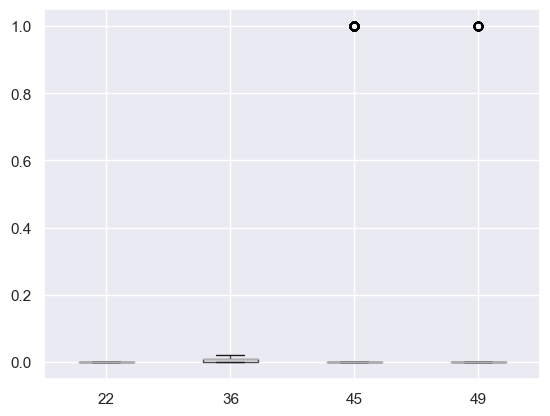

In [61]:
oil.boxplot([22, 36, 45, 49])

Something is obviously going on with those columns, and they should be investigated before being used in modeling and analysis. You don't want to throw away a perfectly good categorical column that is already in number form.

Now, let's go back to our penguins. If we just ask Pandas to create a default boxplot, we see that the body_mass_g column overshadows the others (indicating it may be a good candidate for scaling, later).

<AxesSubplot:>

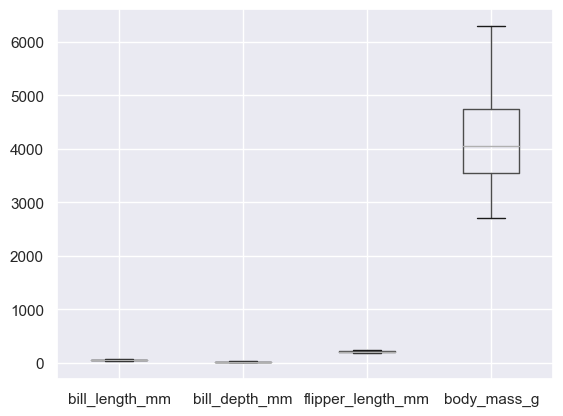

In [62]:
penguins.boxplot()

Let's look at the columns without body_mass_g:

In [63]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<AxesSubplot:>

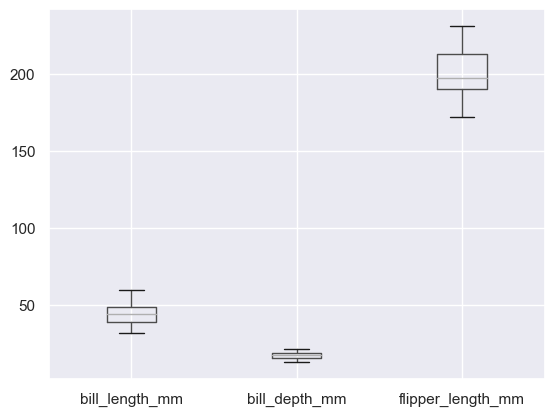

In [64]:
penguins.boxplot(['bill_length_mm', 'bill_depth_mm','flipper_length_mm'])

<AxesSubplot:>

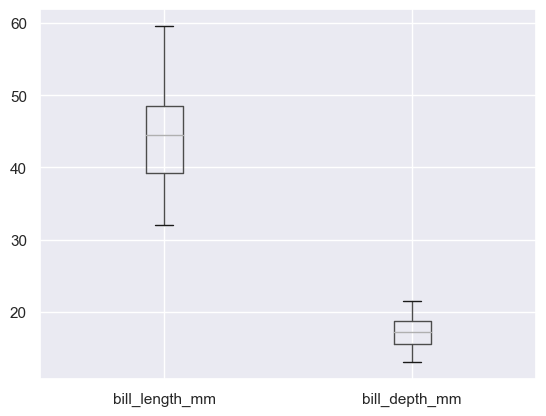

In [65]:
penguins.boxplot(['bill_length_mm', 'bill_depth_mm'])

In [66]:
penguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

## Duplicate Rows

Pandas can give us some help in identifying duplicate rows, although it just gives us a True or False. To see it in action, let's look at the **Iris** data set:

In [113]:
iris = sns.load_dataset('iris')

In [114]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

To really see what is going on, we can use the Python `any()` filter:

In [116]:
iris.duplicated().any()

True

OK, so we have some duplicates. Let's put that back in the dataset to see which ones:

In [117]:
dupes = iris.duplicated()
print(iris[dupes])

     sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica


Pandas also has a `drop_duplicates()` function to help.

In [118]:
print(f'Before: {iris.shape}')
iris.drop_duplicates(inplace=True)
print(f'After: {iris.shape}')

Before: (150, 5)
After: (149, 5)


## Outliers

Outliers are data points that **lie out**side of "normal" observations. 

As we saw earlier, boxplots can show us outliers, and so can scatter plots. Remember, column 3 of the **oil** data set had some outliers: 

<Axes: xlabel='2', ylabel='3'>

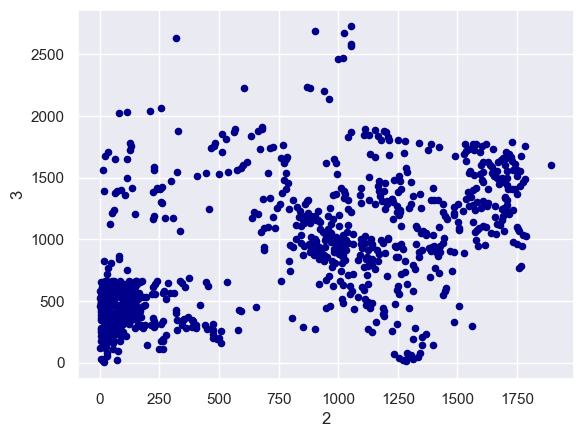

In [119]:
oil.plot.scatter(2,3, c='darkblue')

It really gets fun when we add color. Let's look at our penguins...

I'm switching to Seaborn because Pandas can't interpret 'species' unless I convert it to a number.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

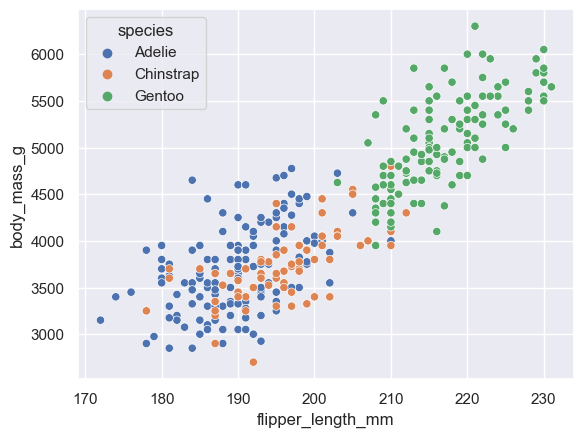

In [121]:
sns.scatterplot(data=penguins,x='flipper_length_mm', y='body_mass_g',hue='species')

Wow... there is clearly a linear relationship between flipper length and body mass, and Gentoo penguins are obviously larger than the other two species. 

Sometimes the outliers aren't as easy to identify visually. **Jason Brownlee** presents several methods for mathematically determining outliers, including:<br>
* Standard deviation method<br>
* Interquartile range method<br>

Then he introduces **Automatic Outlier Detection** using SciKit-Learn's `LocalOutlierFactor` class and demonstrates how removing outliers improves predictive accuracy using one of the simplest forms of predictive modeling -- linear regression. In a nutshell, linear regression uses the training data to draw a straight "regression" line on the graph of the data. Predictive requests are then matched up to the appropriate (x, y) coordinate and the resulting value returned.

Mr. Brownlee's code is reproduced below:

First, **linear regression** leaving the outliers in:

In [123]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('data_wk3/housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [124]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


According to https://www.statisticshowto.com/absolute-error/, **Absolute Error** measures the difference between a measured value and the "true" value. In this case, it is the difference between the **predicted** value and the true value.

**Mean Absolute Error (MAE)** measures the mean of all absolute errors in a group of observations (like our test data set).

Now, let's remove the outliers:

In [75]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('data_wk3/housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


---

The decrease in **Mean Absolute Error** indicates an increase in accuracy. The easy assumption is that the outliers biased the model's learning and thus affected the predictive ability. 

# Feature Selection

**Features** are, of course, the columns of your dataset. 

**Feature selection** involves deciding which features to include in the training and usage of machine learning models. 

> Many models, especially those based on regression slopes and intercepts, will estimate
parameters for every term in the model. Because of this, the presence of non-
informative variables can add uncertainty to the predictions and reduce the overall
effectiveness of the model.
>
> *— Page 488, Applied Predictive Modeling, 2013.*

Besides accuracy concerns, with many model types, more features will mean increased training time.  


## Pairplot

Seaborn has the ability to plot each feature, one by one, against the others. As you can see below, this is an easy way to uncover linear relationships.

**Caution:** Doing a pairplot on a large dataset with no restrictions can bring your computer to its knees. Only plot **subsets** of the variables, as appropriate.

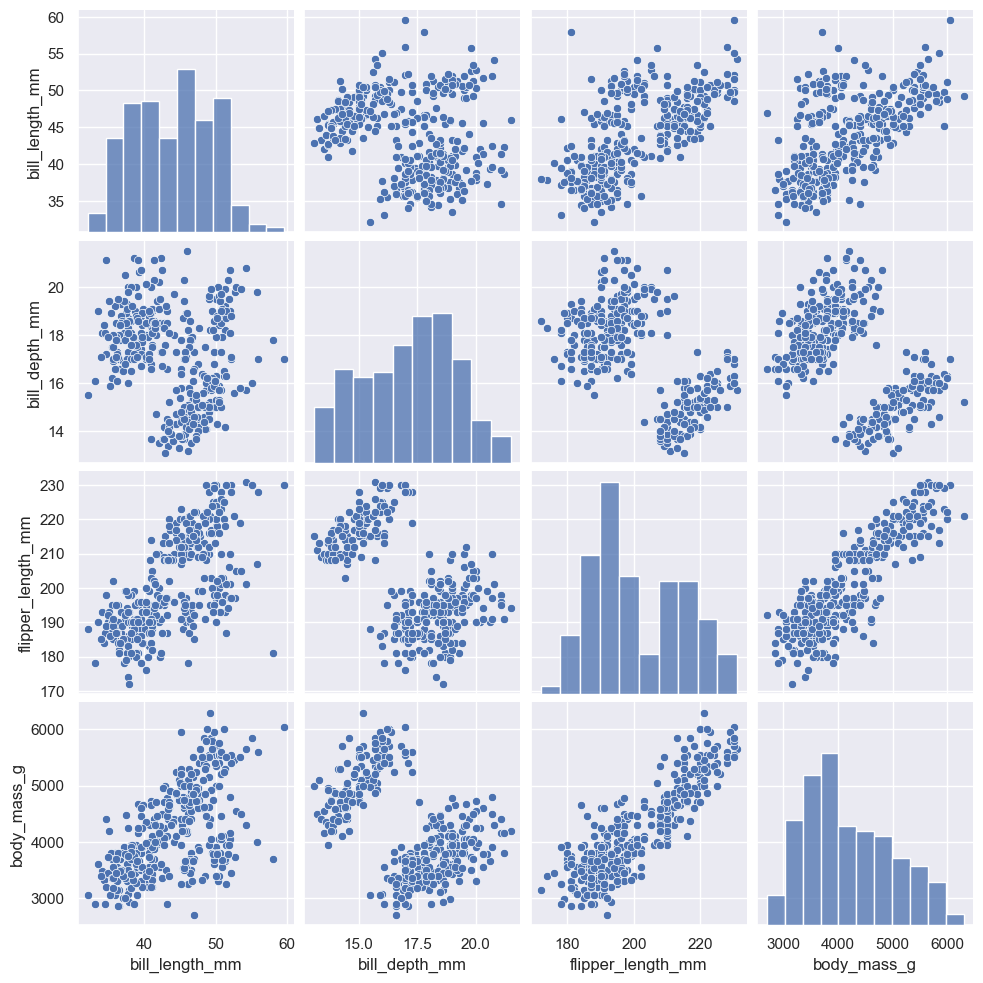

In [76]:
sns.pairplot(penguins)

## Correlation matrix and heatmaps

A Pandas dataset knows how to create a correlation matrix showing relationships among all the features. While this can be useful, it outputs a table of numbers that can be hard to intrepret over a large dataset.

The `corr()` function does a pearson correlation by default, although others are available.

In [77]:
# Pandas' pearson correlation
corrmat = penguins.corr()
corrmat

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


A much better way is to put the correlation matrix into a Seaborn heatmap.

Note that the heatmap will show both positive and negative correlations.

<AxesSubplot:>

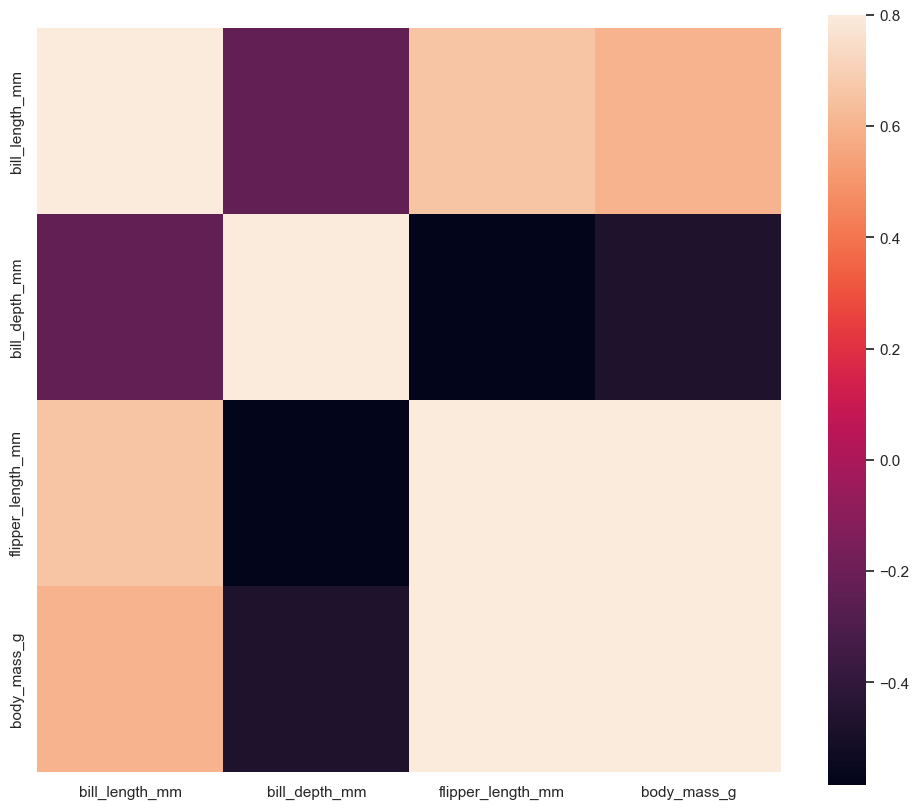

In [78]:
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True)

---

It might be useful to see the actual correlation values in the heatmap cells. To do that, we can turn on cell annotations with the `annot=True` parameter:

In [79]:
cols = penguins.columns

<function matplotlib.pyplot.show(close=None, block=None)>

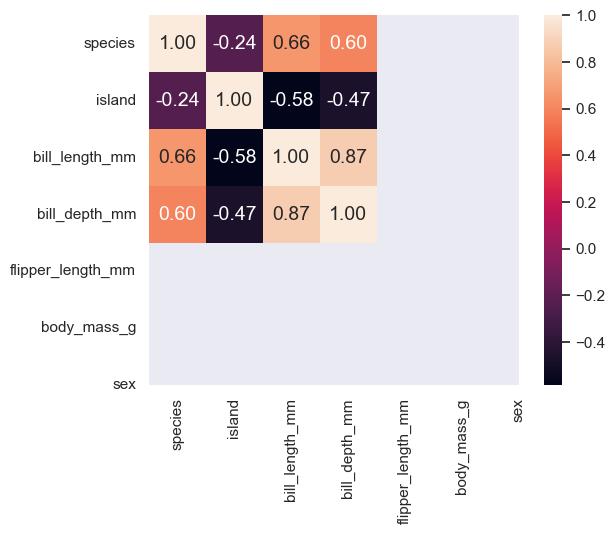

In [82]:
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

But what if we have a whole bunch of variables? Remember our housing dataset? Let's look at a version that has headers real quick:

In [125]:
house = pd.read_csv('data_wk3/housing_train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's drop that Id column. It won't help anything in the analysis.

In [126]:
house.drop('Id', axis=1, inplace=True)

In [127]:
house.shape

(1460, 80)

81 columns should be enough to prove a point.

First, the heatmap:

In [86]:
house_cor = house.corr()

<AxesSubplot:>

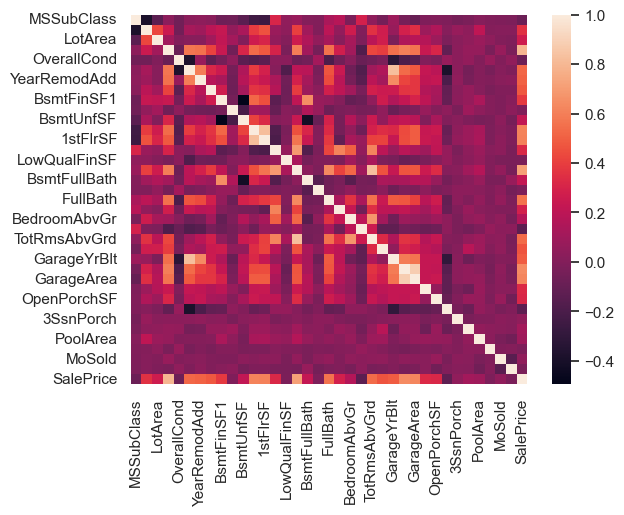

In [87]:
sns.heatmap(house_cor)

Looks a bit like a pizza!

Maybe making it bigger will help.

<AxesSubplot:>

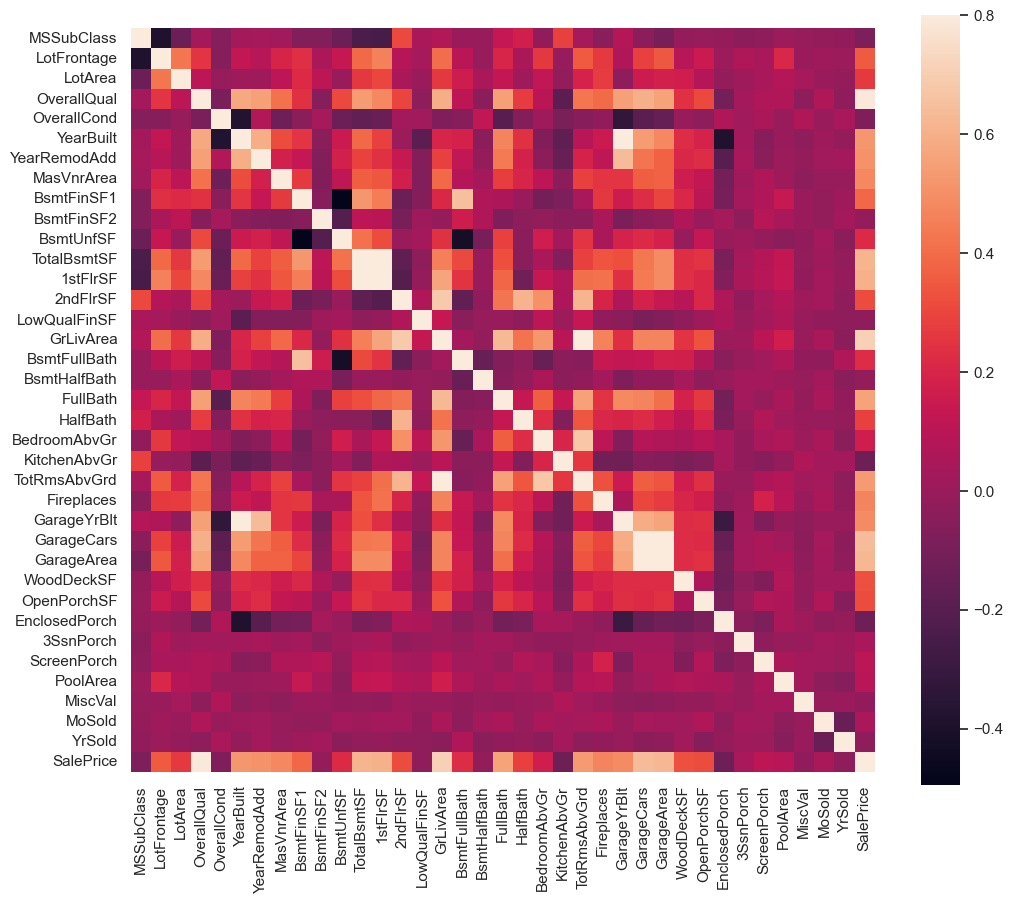

In [88]:
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(house_cor, vmax = .8, square=True)

That's still a lot of variables. **SalePrice** is often our ML target variable, trying to predict sales price based on other factors. Let's look at the top 10 variables related to SalePrice.

<function matplotlib.pyplot.show(close=None, block=None)>

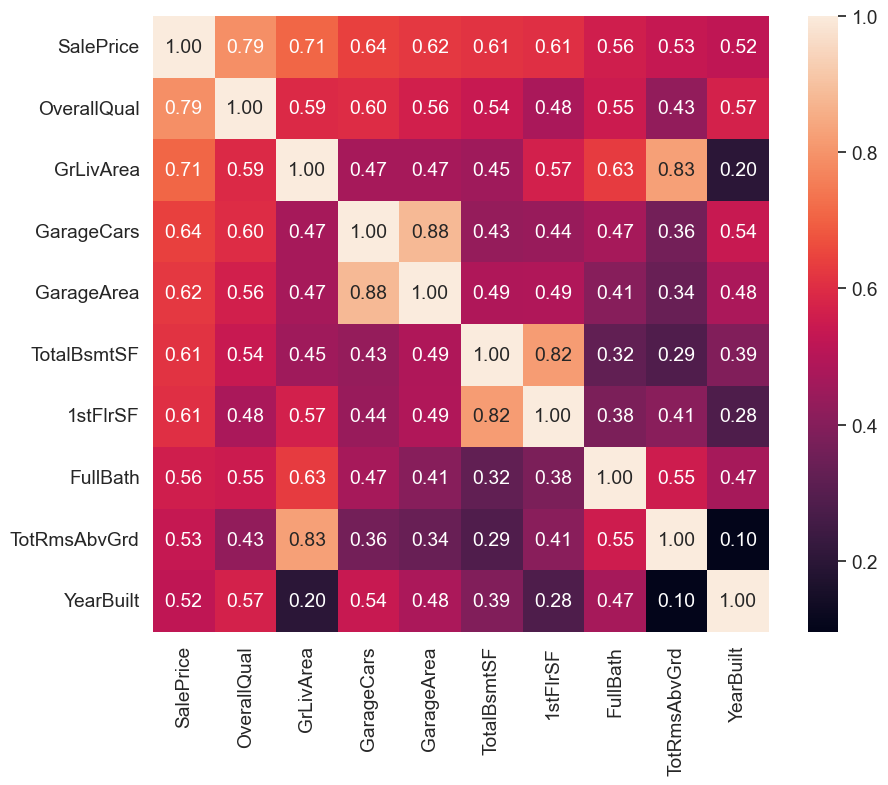

In [89]:
k = 10
cols = house_cor.nlargest(k, 'SalePrice')['SalePrice'].index

#Numpy corrcoef gives a pearson correlation coefficient
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

## Statistical selection

**Jason Brownlee** very helpfully breaks statistics-based feature selection down based on **input variable** and **output type.** Either one can be numerical or categorical. The output variable type will be determined by the type of problem you are solving.

**Output Variable**:
* Numerical -- Regression predictive modeling.
* Categorical -- Classification predictive modeling.

<img style="padding-right:10px;" src="figures_wk3/feature_selection_graph.png" ><br>

Pearson's was demonstrated above with the correlation matrix and heatmaps. Other methods will be demonstrated later and throughout your education.

## Feature importance -- RandomForest

One of my favorite methods of choosing features is to let the RandomForest algorithm tell me what it decided was important.

Tree-based algorithms operate very much like a single *binary tree*. A starting point is determined, then a decision is made to get down to the next level, over and over, until an answer is reached. The graph above showing variable selection is a good example. 

Classification and regression trees (CART) track the importance of the variables at the decision points.

A **RandomForest** uses a whole bunch of decision trees to solve a problem, and because many trees are used, many solutions can be tried, improving results. 

Let's use a `RandomForestRegressor` on the housing dataset and see if it agrees with what our heatmap told us.

**First**, the RandomForestRegressor will only use numeric data, so we are going to ignore the categorical columns, for now. a truly complete picture would include them, of course. 

The correlation matrix dataset above should give us the column names of the numeric columns, so we'll just make a subset using it, but first we'll have to deal with **missing values**. In this case, we will drop them. **If I were really trying to do predictions, I would impute them.**

In [90]:
house_cor.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [91]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [92]:
#dealing with missing data
house = house.drop((missing_data[missing_data['Total'] > 1]).index,1)
house = house.drop(house.loc[house['Electrical'].isnull()].index)
house.isnull().sum().max() #just checking that there's no missing data missing...

/var/folders/46/fc0m0w3s3ys2pf5t3f9rvj800000gp/T/ipykernel_34055/2571124678.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  house = house.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

In [93]:
house_cor = house.corr()

In [94]:
X = house[house_cor.columns[:-1]]
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [95]:
y = house['SalePrice'].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
model = RandomForestRegressor()

In [98]:
model.fit(X,y)

RandomForestRegressor()

In [99]:
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance
# importance = model.feature_importances_
# X.columns

[('OverallQual', 0.5918298364419323),
 ('GrLivArea', 0.11510013930751536),
 ('TotalBsmtSF', 0.044777398236799784),
 ('2ndFlrSF', 0.03674929730074001),
 ('BsmtFinSF1', 0.03444319416077299),
 ('1stFlrSF', 0.02644289482974236),
 ('GarageCars', 0.023500341144961346),
 ('GarageArea', 0.01838150662316338),
 ('LotArea', 0.01717736736194833),
 ('YearBuilt', 0.015398423951760944),
 ('YearRemodAdd', 0.010730261640541933),
 ('OpenPorchSF', 0.007670404511372421),
 ('BsmtUnfSF', 0.007574398862677622),
 ('WoodDeckSF', 0.007051944682010112),
 ('OverallCond', 0.007039521882390221),
 ('TotRmsAbvGrd', 0.005234221576772469),
 ('FullBath', 0.004519684499872622),
 ('MoSold', 0.004433473993811001),
 ('Fireplaces', 0.004032196529919211),
 ('BedroomAbvGr', 0.0028068495909715635),
 ('MSSubClass', 0.0027886130834891745),
 ('YrSold', 0.0027413209308236324),
 ('BsmtFullBath', 0.001703003434892315),
 ('ScreenPorch', 0.001596197205782807),
 ('KitchenAbvGr', 0.0014638540221468769),
 ('EnclosedPorch', 0.0011208776378

You would need to make a decision at what point a feature is not important enough to use. **Many times I'll throw in a column of random numbers and use all the columns that are more important than the randoms.**

Here is a really fancy way to display the list -- I'll leave it up to you to figure out how it works.

In [99]:
max_feature_len = len(max(X.columns, key=len))

In [100]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

OverallQual: .. 58.37%
GrLivArea: .... 11.53%
TotalBsmtSF: .. 4.61%
2ndFlrSF: ..... 4.30%
BsmtFinSF1: ... 3.21%
GarageCars: ... 2.59%
1stFlrSF: ..... 2.40%
GarageArea: ... 1.74%
LotArea: ...... 1.62%
YearBuilt: .... 1.61%
YearRemodAdd: . 1.14%
TotRmsAbvGrd: . 0.89%
WoodDeckSF: ... 0.68%
BsmtUnfSF: .... 0.65%
OverallCond: .. 0.64%
OpenPorchSF: .. 0.62%
FullBath: ..... 0.61%
MoSold: ....... 0.53%
Fireplaces: ... 0.35%
MSSubClass: ... 0.29%
BedroomAbvGr: . 0.27%
YrSold: ....... 0.24%
ScreenPorch: .. 0.19%
EnclosedPorch:  0.15%
BsmtFullBath: . 0.14%
BsmtFinSF2: ... 0.13%
HalfBath: ..... 0.13%
BsmtHalfBath: . 0.13%
KitchenAbvGr: . 0.10%
3SsnPorch: .... 0.06%
PoolArea: ..... 0.04%
LowQualFinSF: . 0.02%
MiscVal: ...... 0.01%


---

The section below doesn't really relate to anything beyond some advanced Pandas usage. I just didn't want to throw it away after I got that far and then decided to go a different way.

# Bonus -- finding average weights by gender

Another way to deal with missing 'sex' entries is to try to fill in the values based on weight (or mass, in this case). The cells below make a dataset of the min, max and mean for each species as a start to this method.

In [101]:
penguins[(penguins.species == 'Adelie') & (penguins.sex == 'Male')].body_mass_g.max()

4775.0

In [102]:
penguins[(penguins.species == 'Adelie') & (penguins.sex == 'Male')].body_mass_g.min()

3325.0

It's great to be able to figure these out one at a time, but what if we had 100 speies? We need to generalize this.

In [103]:
peng_mass = penguins.groupby(['species','sex']).agg({'body_mass_g':['min','max', 'mean']})

In [104]:
peng_mass

body_mass_g                     
                         min     max         mean
species   sex                                    
Adelie    Female      2850.0  3900.0  3368.506494
          Male        3325.0  4775.0  4046.283784
Chinstrap Female      2700.0  4150.0  3527.205882
          Male        3250.0  4800.0  3938.970588
Gentoo    Female      3950.0  5200.0  4673.790323
          Male        4750.0  6300.0  5484.836066

In [105]:
type(peng_mass)

pandas.core.frame.DataFrame

--- 

OK, this is good. this gave us min and max ranges for each species, but our resulting dataframe is some weird multi-indexed thing. We can **reset the index** to fix some of it:

In [106]:
# Remember, this isn't permanent until we use an assignment ('=')
peng_mass.reset_index()

species     sex body_mass_g                     
                             min     max         mean
0     Adelie  Female      2850.0  3900.0  3368.506494
1     Adelie    Male      3325.0  4775.0  4046.283784
2  Chinstrap  Female      2700.0  4150.0  3527.205882
3  Chinstrap    Male      3250.0  4800.0  3938.970588
4     Gentoo  Female      3950.0  5200.0  4673.790323
5     Gentoo    Male      4750.0  6300.0  5484.836066

---

But, the min, max, and mean columns are still oddly-named and difficult to access, as seen below:

In [107]:
peng_mass = peng_mass.reset_index()
peng_mass.iloc[0]

species                   Adelie
sex                       Female
body_mass_g  min          2850.0
             max          3900.0
             mean    3368.506494
Name: 0, dtype: object

In [108]:
peng_mass.columns

MultiIndex([(    'species',     ''),
            (        'sex',     ''),
            ('body_mass_g',  'min'),
            ('body_mass_g',  'max'),
            ('body_mass_g', 'mean')],
           )

---

OK, one more try. Let's look at the `to_flat_index()` function:

In [109]:
peng_mass.columns.to_flat_index()

Index([        ('species', ''),             ('sex', ''),
        ('body_mass_g', 'min'),  ('body_mass_g', 'max'),
       ('body_mass_g', 'mean')],
      dtype='object')

---

Getting closer, maybe. Let's combine with a string `join()` function:

In [110]:
peng_mass.columns.to_flat_index().str.join('_')

Index(['species_', 'sex_', 'body_mass_g_min', 'body_mass_g_max',
       'body_mass_g_mean'],
      dtype='object')

---

That looks pretty good. Let's make it permanent and see what the columns look like:

In [111]:
peng_mass.columns = peng_mass.columns.to_flat_index().str.join('_')

peng_mass

,species_,sex_,body_mass_g_min,body_mass_g_max,body_mass_g_mean
0,Adelie,Female,2850.0,3900.0,3368.506494
1,Adelie,Male,3325.0,4775.0,4046.283784
2,Chinstrap,Female,2700.0,4150.0,3527.205882
3,Chinstrap,Male,3250.0,4800.0,3938.970588
4,Gentoo,Female,3950.0,5200.0,4673.790323
5,Gentoo,Male,4750.0,6300.0,5484.836066


---

OK, at this point we have options how to fill in the missing values based on our new table. Unfortunately, there is overlap in the weight ranges between males and females, so we can't just check which range the unknown falls into. 

In [112]:
penguins[penguins.sex.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [113]:
peng_mass[(peng_mass.species_=='Adelie') & (peng_mass.sex_=='Female')].body_mass_g_mean

0    3368.506494
Name: body_mass_g_mean, dtype: float64

In [114]:
3700 - 3368

332

In [115]:
3700 - 4043

-343